<font size="10">CAR Price Prediction using Neural Network</font>


<span style="font-size: 30px;">Importing the Libraries & Loading data .</span>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import tensorflow as tf

2024-04-18 00:40:41.966539: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-18 00:40:42.855860: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


<span style="font-size: 12px;">Data Credit : https://www.kaggle.com/datasets/vijayaadithyanvg/car-price-predictionused-cars .</span>

In [6]:
#Read csv file using pandas
data = pd.read_csv("/home/rahul/Mohit/Downloads/Data/car data.csv")

#Adding new feture column "Age" 
data['Age'] = 2024 - data['Year']

#changing name of columns
data.rename(columns = {'Selling_Price':'Selling_Price (lakhs)', 'Present_Price':'Present_Price (lakhs)', 'Owner':'Past_Owners'}, inplace=True)
data

Car_Name  Year  Selling_Price (lakhs)  Present_Price (lakhs)  Driven_kms  \
0       ritz  2014                   3.35                   5.59       27000   
1        sx4  2013                   4.75                   9.54       43000   
2       ciaz  2017                   7.25                   9.85        6900   
3    wagon r  2011                   2.85                   4.15        5200   
4      swift  2014                   4.60                   6.87       42450   
..       ...   ...                    ...                    ...         ...   
296     city  2016                   9.50                  11.60       33988   
297     brio  2015                   4.00                   5.90       60000   
298     city  2009                   3.35                  11.00       87934   
299     city  2017                  11.50                  12.50        9000   
300     brio  2016                   5.30                   5.90        5464   

    Fuel_Type Selling_type Transmission  Past_Owners  Age  
0      Petrol       Dealer       Manual            0   10  
1      Diesel       Dealer       Manual            0   11  
2      Petrol       Dealer       Manual            0    7  
3      Petrol       Dealer       Manual            0   13  
4      Diesel       Dealer       Manual            0   10  
..        ...          ...          ...          ...  ...  
296    Diesel       Dealer       Manual            0    8  
297    Petrol       Dealer       Manual            0    9  
298    Petrol       Dealer       Manual            0   15  
299    Diesel       Dealer       Manual            0    7  
300    Petrol       Dealer       Manual            0    8  

[301 rows x 10 columns]

<span style="font-size: 30px;">Exploring and Visualizing the Dataset.</span>

In [7]:
#Dividing columns into two types String and Numerical

string_columns=data.select_dtypes(include=['object']).columns.tolist()
print("String columns :" , string_columns)

numerical_columns=data.select_dtypes(include=['int64','float64']).columns.tolist()
#numerical_columns=numerical_columns[:-1]
print("Numerical columns :", numerical_columns)

#data[string_columns]
#data[numerical_columns]



String columns : ['Car_Name', 'Fuel_Type', 'Selling_type', 'Transmission']
Numerical columns : ['Year', 'Selling_Price (lakhs)', 'Present_Price (lakhs)', 'Driven_kms', 'Past_Owners', 'Age']


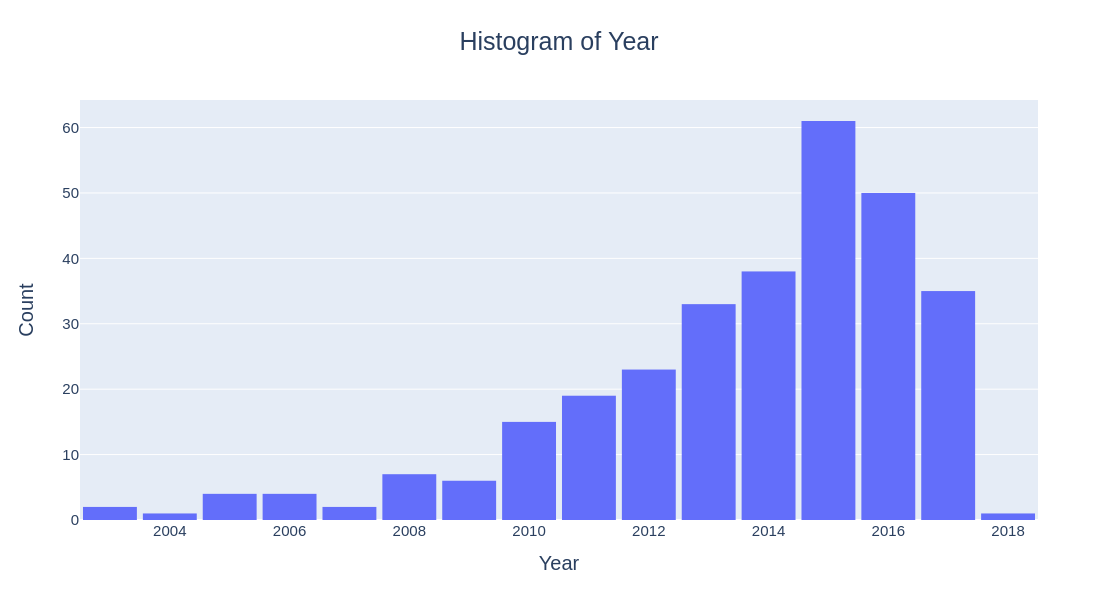

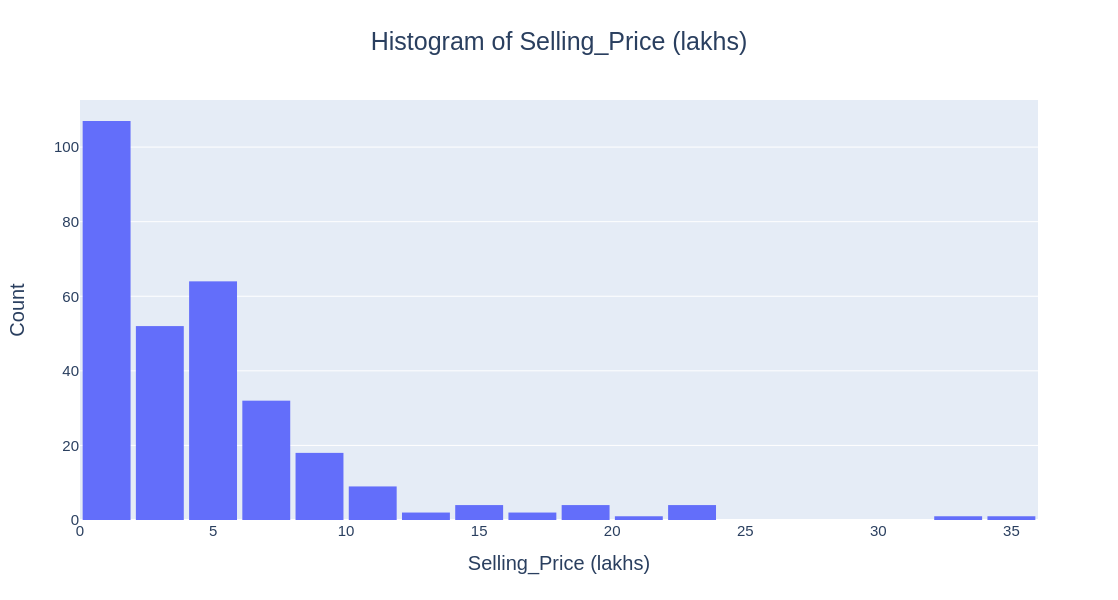

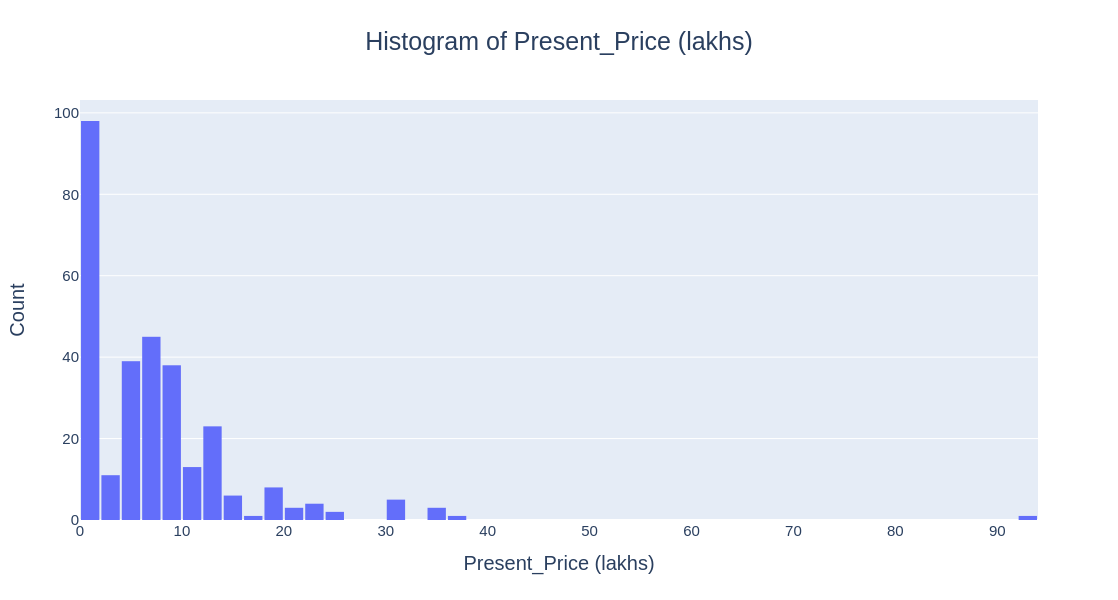

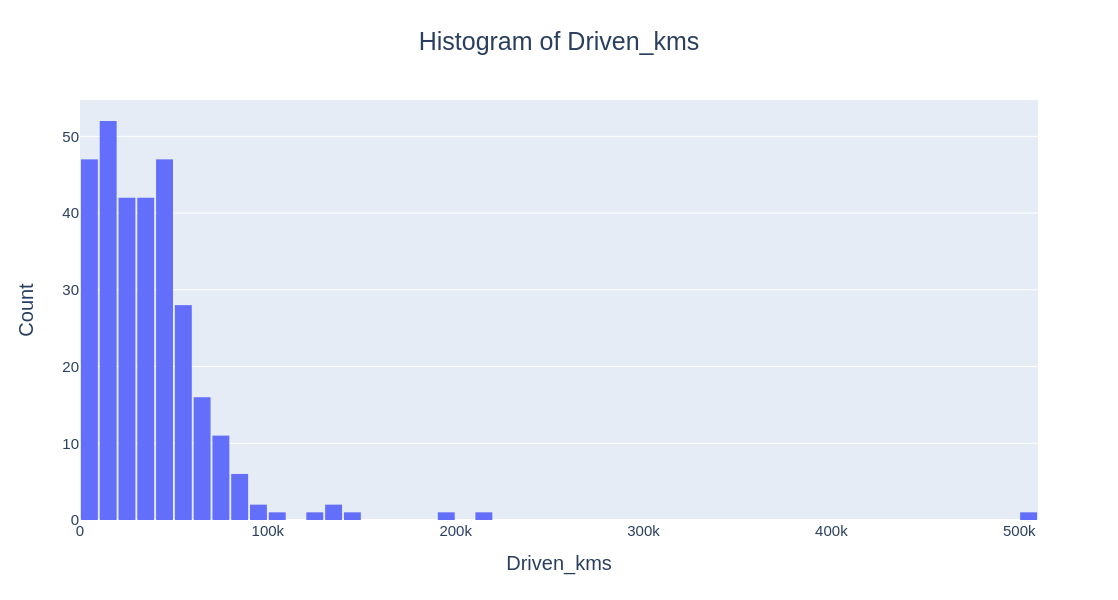

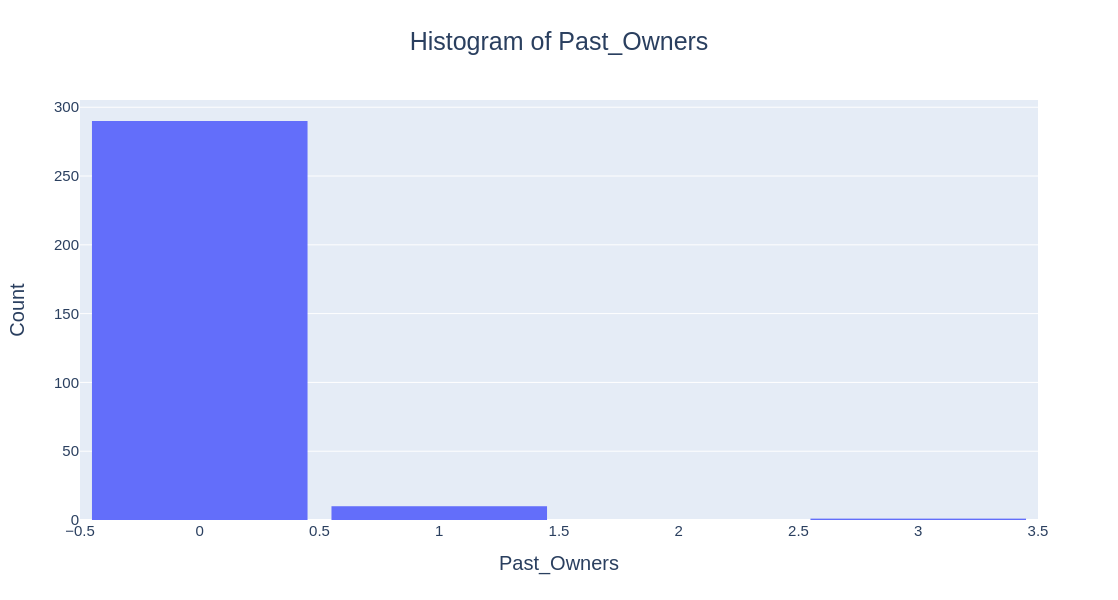

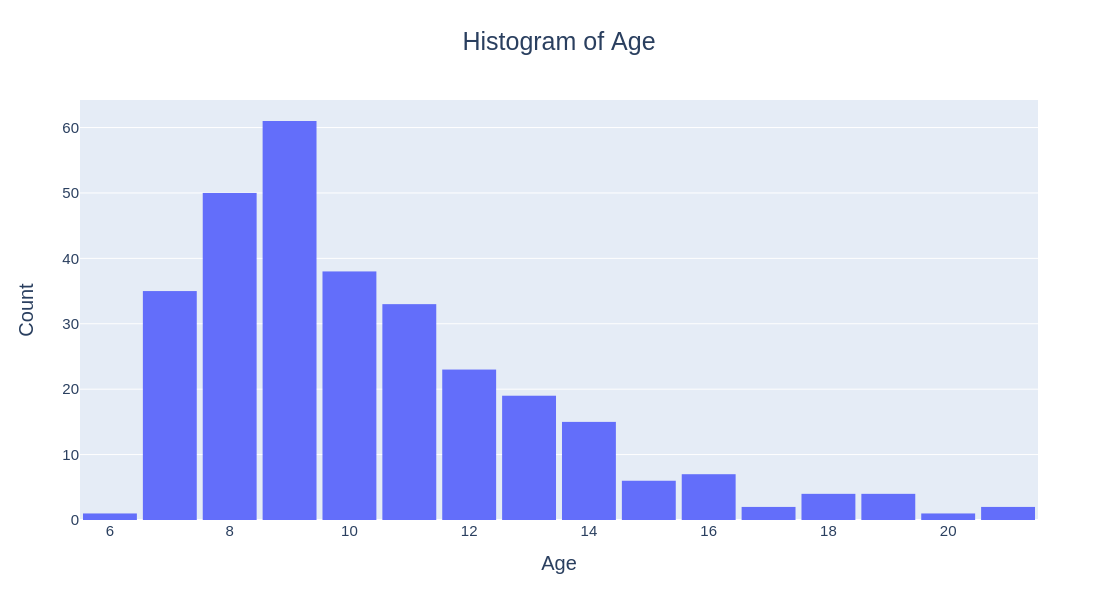

In [8]:
#Historam Plots

for i in numerical_columns:
    # Create a histogram using Plotly Express
    fig = px.histogram(data, x=i, title=f'Histogram of {i}',width=1000, height=600)
    
    #Addding Title of Histograms and keep it at center
    fig.update_layout(title={'text': 'Histogram of ' + i, 'x':0.5, 'xanchor': 'center', 'font': {'size': 25}})

    # Update the layout to change font size of x and y labels and values
    fig.update_layout(xaxis=dict(title=i, titlefont=dict(size=20),tickfont=dict(size=15)),
                       yaxis=dict(title='Count', titlefont=dict(size=20),tickfont=dict(size=15)))
    
    
    # Adjust the gap width between bars (increase to add space)
    fig.update_layout(bargap=0.1)     
    # Show the plot
    fig.show()

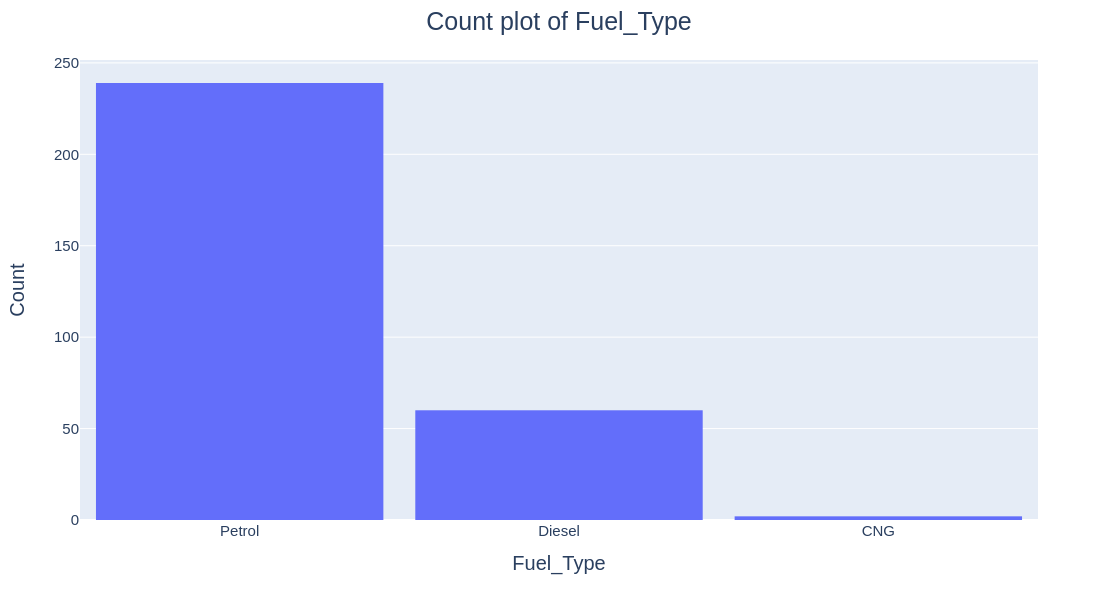

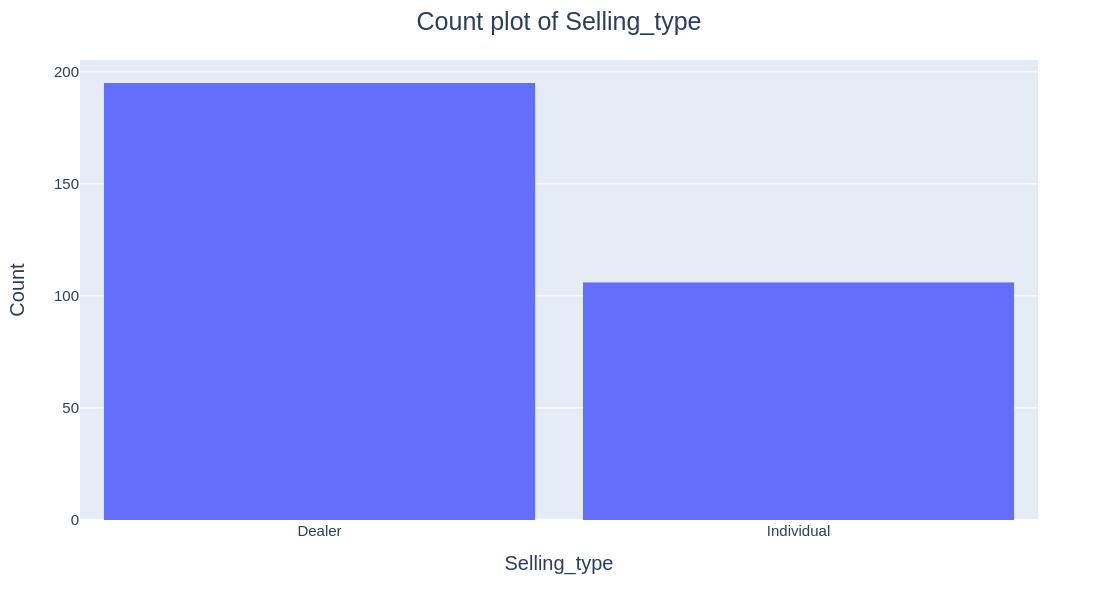

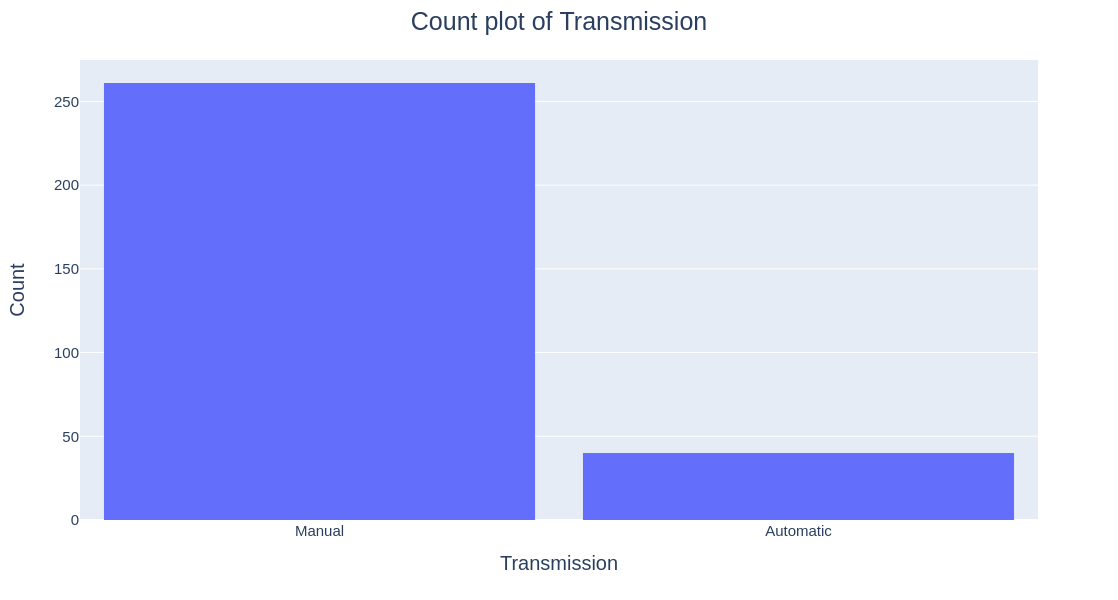

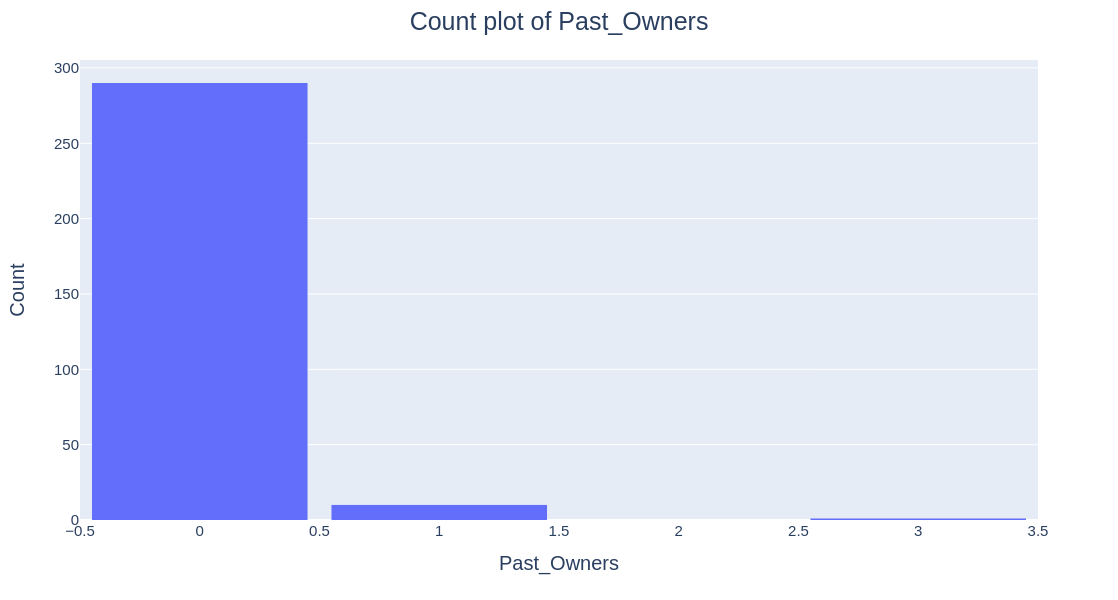

In [9]:
#Count plots

for i in data.columns[5:9]:
    # Create a bar chart using Plotly Express with a dark color
    fig = px.histogram(data, x=i, barmode='group',width=1000, height=600)
    
    #Addding Title of Histograms and keep it at center
    fig.update_layout(title={'text': 'Count plot of ' + i, 'x':0.5, 'xanchor': 'center', 'font': {'size': 25}})
    
    # Update the layout to change font size of x and y labels and values
    fig.update_layout(xaxis=dict(title=i, titlefont=dict(size=20),tickfont=dict(size=15)),
                       yaxis=dict(title='Count', titlefont=dict(size=20),tickfont=dict(size=15)))
    
    # Adjust the gap width between bars (increase to add space)
    fig.update_layout(bargap=0.1)     

    # Show the plot
    fig.show()



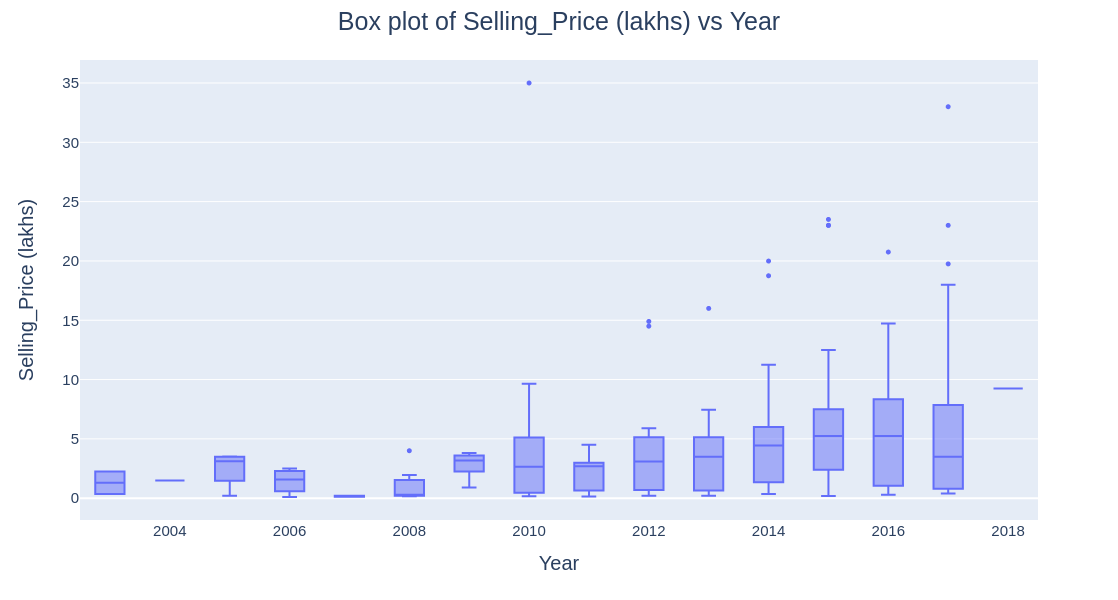

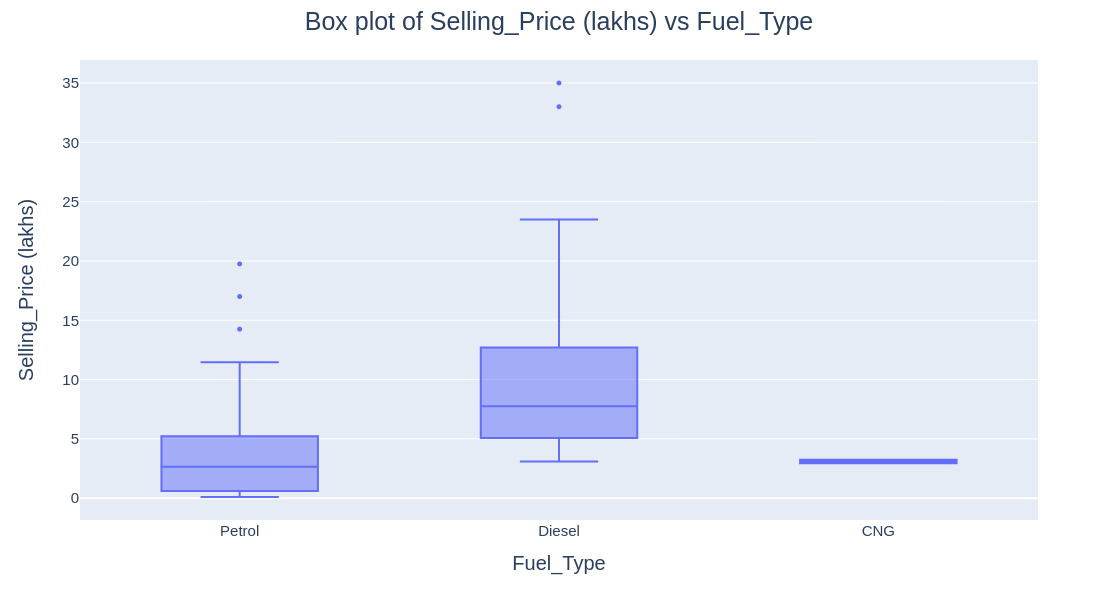

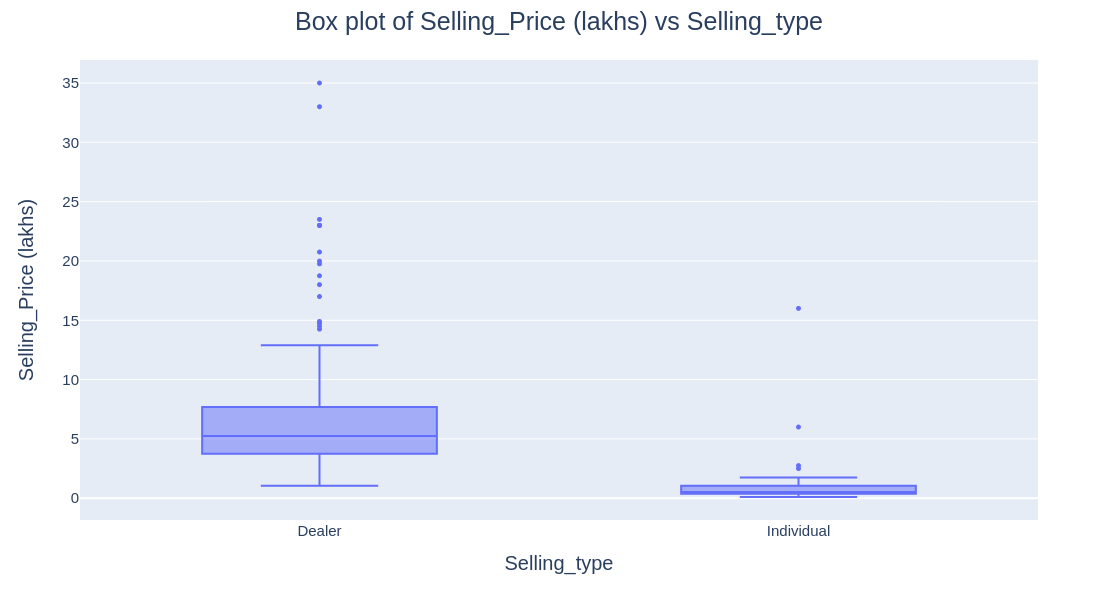

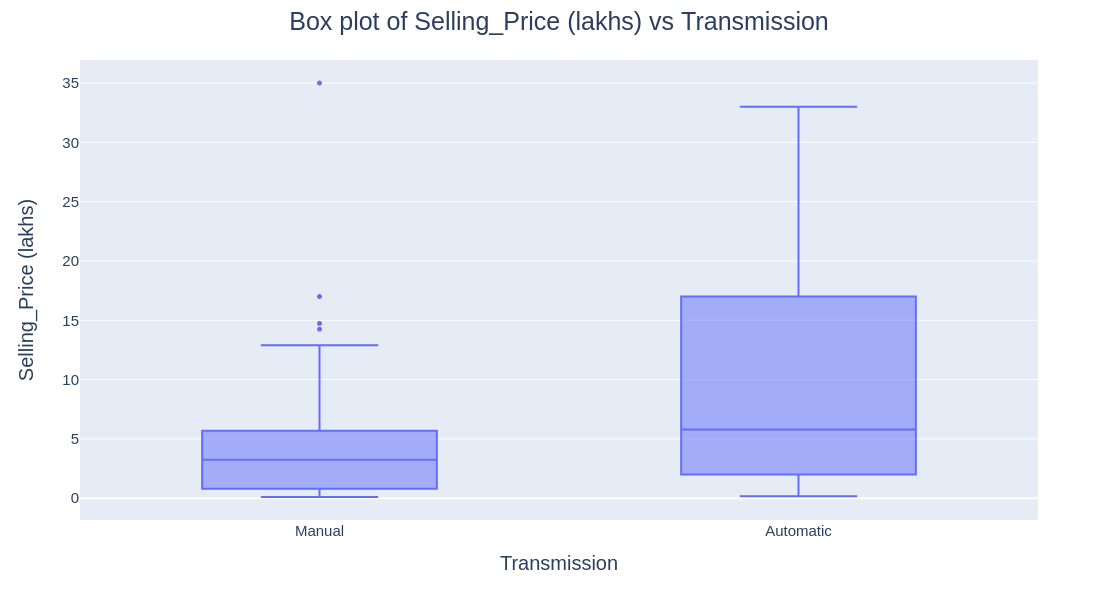

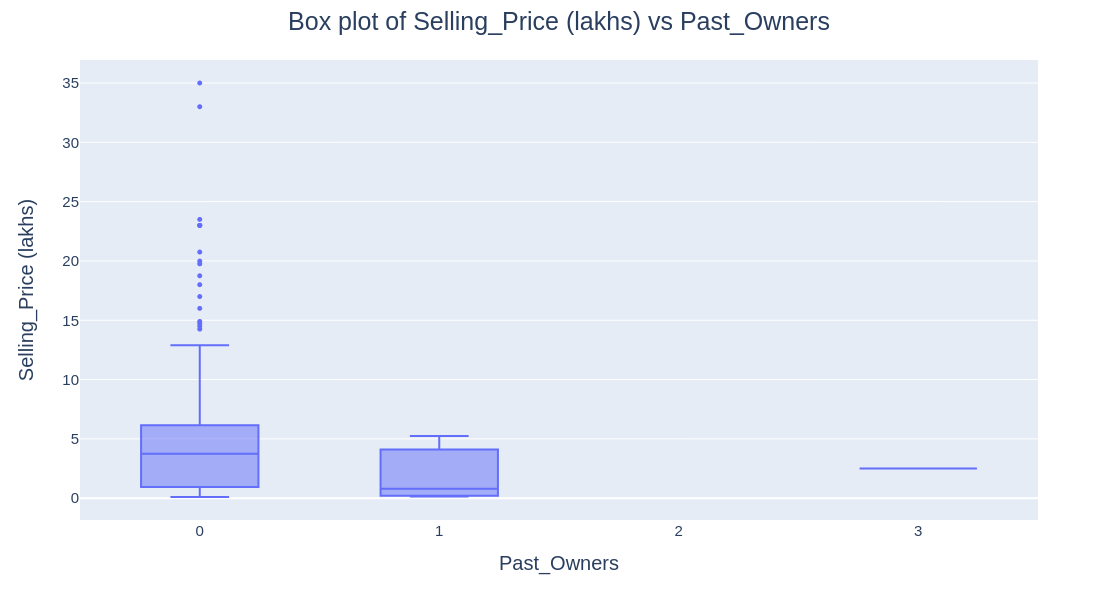

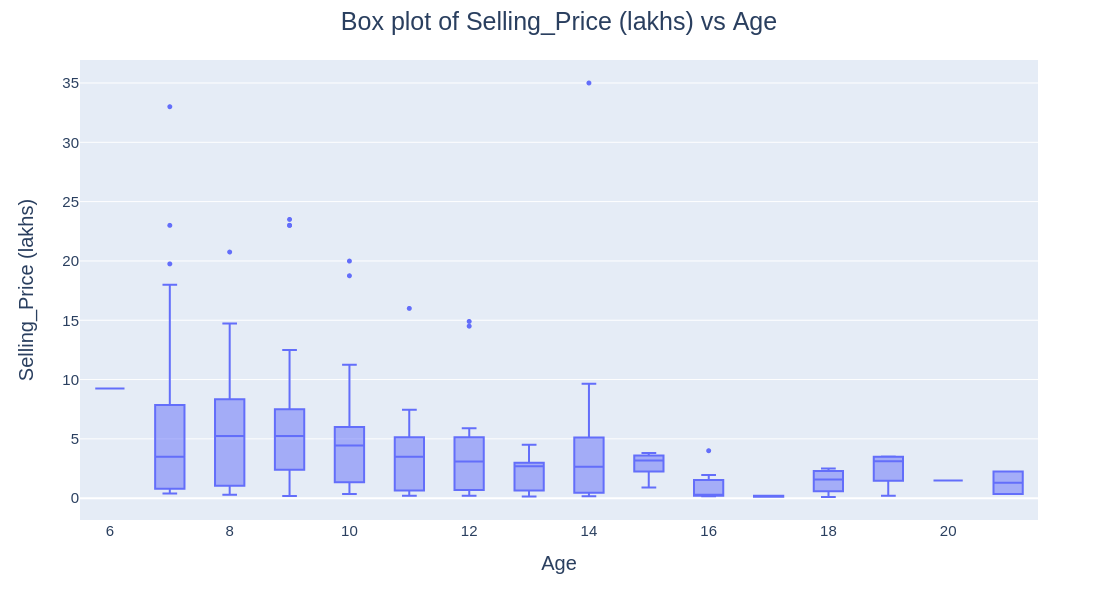

In [10]:

col = ['Year', 'Fuel_Type', 'Selling_type', 'Transmission', 'Past_Owners', 'Age']
for i in col:
    # Create box plot using Plotly Express
    fig = px.box(data, x=i, y='Selling_Price (lakhs)' ,width=1000, height=600)

    #Addding Title of Histograms and keep it at center
    fig.update_layout(title={'text': 'Box plot of Selling_Price (lakhs) vs ' + i, 'x':0.5, 'xanchor': 'center', 'font': {'size': 25}})

    # Update the layout to change font size of x and y labels and values
    fig.update_layout(xaxis=dict(title=i, titlefont=dict(size=20),tickfont=dict(size=15)),
                       yaxis=dict(title='Selling_Price (lakhs)', titlefont=dict(size=20),tickfont=dict(size=15)))
    # Update outlier marker size
    fig.update_traces(marker=dict(size=5))

    # Show the plot
    fig.show()


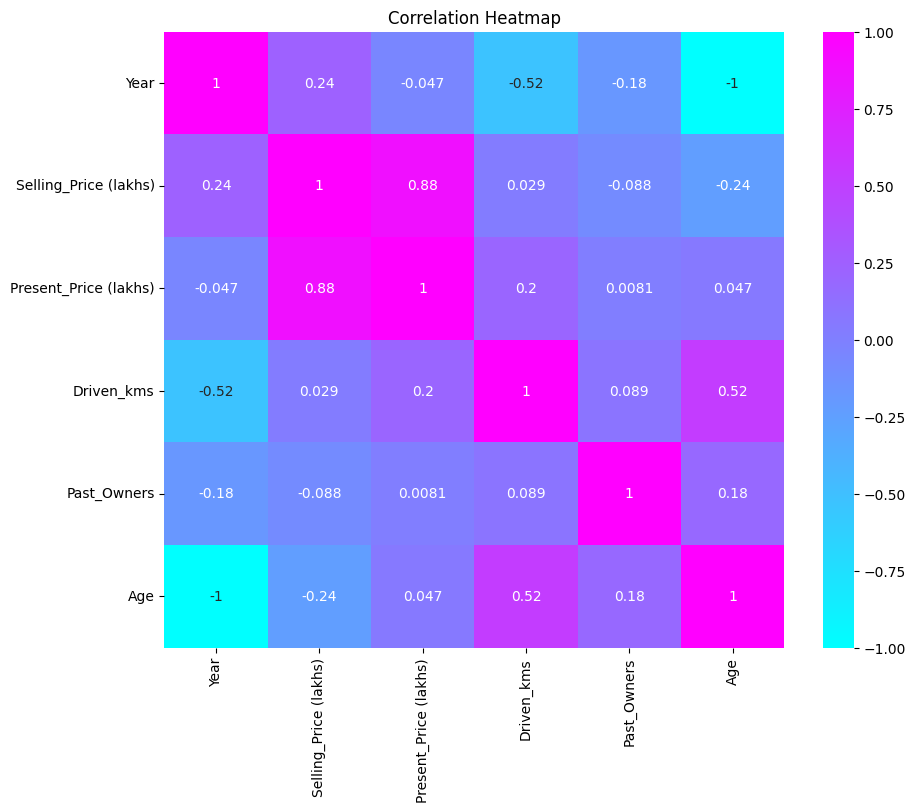

In [11]:
#correlation matrix 
correlation_matrix = data[numerical_columns].corr()
#OR
#correlation_matrix = data[data.select_dtypes(include=['int64','float64']).columns[1:]].corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='cool')
plt.title("Correlation Heatmap")
plt.show()

In [12]:
#Selecting Data points for X and Y

X=data.copy()
X = data.drop(columns=['Selling_Price (lakhs)','Car_Name']) 

Y = data['Selling_Price (lakhs)'] 

string_columns=X.select_dtypes(include=['object']).columns.tolist()
print("String columns :" , string_columns)

numerical_columns=X.select_dtypes(include=['int64','float64']).columns.tolist()
#numerical_columns=numerical_columns[:-1]
print("Numerical columns :", numerical_columns)


String columns : ['Fuel_Type', 'Selling_type', 'Transmission']
Numerical columns : ['Year', 'Present_Price (lakhs)', 'Driven_kms', 'Past_Owners', 'Age']


In [13]:

#Transforming String columns into numerical values

from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()
sc = StandardScaler()
classlist=[]
for i in string_columns:
    X[i]=le.fit_transform(X[i])
    classlist.append(list(le.classes_))

#OR
#X = pd.get_dummies(data=X)#, drop_first=True)

print(classlist)
column_names=X.columns
X.head(-1)


[['CNG', 'Diesel', 'Petrol'], ['Dealer', 'Individual'], ['Automatic', 'Manual']]


Year  Present_Price (lakhs)  Driven_kms  Fuel_Type  Selling_type  \
0    2014                   5.59       27000          2             0   
1    2013                   9.54       43000          1             0   
2    2017                   9.85        6900          2             0   
3    2011                   4.15        5200          2             0   
4    2014                   6.87       42450          1             0   
..    ...                    ...         ...        ...           ...   
295  2015                  13.09       60076          1             0   
296  2016                  11.60       33988          1             0   
297  2015                   5.90       60000          2             0   
298  2009                  11.00       87934          2             0   
299  2017                  12.50        9000          1             0   

     Transmission  Past_Owners  Age  
0               1            0   10  
1               1            0   11  
2               1            0    7  
3               1            0   13  
4               1            0   10  
..            ...          ...  ...  
295             1            0    9  
296             1            0    8  
297             1            0    9  
298             1            0   15  
299             1            0    7  

[300 rows x 8 columns]

<font size="12">Prediction using Linear Regression</font>

In [14]:
#Prediction using Linear Regression

from sklearn.model_selection import train_test_split
X_trainLR, X_testLR, Y_trainLR, Y_testLR = train_test_split(X, Y, test_size=0.25)


X_trainLR=sc.fit_transform(X_trainLR) 
X_testLR=sc.transform(X_testLR) 
# Model training
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_trainLR, Y_trainLR)

# Predictions
Y_PredLR = model.predict(X_testLR)

print("Accuracy (Linear Regression): ", model.score(X_testLR, Y_testLR) * 100)
pred=pd.DataFrame({'Actual Selling Price (lakhs)':Y_testLR,'Predicted Price (lakhs)':Y_PredLR,'Difference':Y_testLR-Y_PredLR})
pred



Accuracy (Linear Regression):  82.9872805838738


Actual Selling Price (lakhs)  Predicted Price (lakhs)  Difference
154                          0.50                 0.497343    0.002657
172                          0.40                 0.383523    0.016477
50                          14.90                16.408380   -1.508380
54                           2.75                 0.578103    2.171897
128                          0.80                 1.745253   -0.945253
..                            ...                      ...         ...
138                          0.60                 1.306829   -0.706829
282                          8.25                 8.896132   -0.646132
137                          0.65                 0.027452    0.622548
83                          12.50                 9.131033    3.368967
96                          20.75                15.995277    4.754723

[76 rows x 3 columns]

In [15]:
#evaluate the Mean Absolute Error, Mean Squared Error and R-Squared
from sklearn import metrics

MAE_LR='{:.2f}'.format(metrics.mean_absolute_error(Y_PredLR,Y_testLR))
MSE_LR='{:.2f}'.format(metrics.mean_squared_error(Y_PredLR,Y_testLR))
RS_LR='{:.2f}'.format(metrics.r2_score(Y_PredLR,Y_testLR))

print("Linear Reression Method -")
print('Mean Absolute Error:',MAE_LR)
print('Mean Squared Error :',MSE_LR)
print('R-Squared',RS_LR)


Linear Reression Method -
Mean Absolute Error: 1.43
Mean Squared Error : 5.34
R-Squared 0.78


<font size="12">Prediction using Neural Network</font>


In [16]:


# X contains features, y contains target variable
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.25, random_state=42)
X_cval, X_test, Y_cval, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)


# Apply transformations to training, validation, and test sets
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_cval = sc.transform(X_cval)
print(np.shape(X_train),np.shape(X_test),np.shape(X_cval))
X_train=pd.DataFrame(X_train,columns=column_names)
X_test=pd.DataFrame(X_test,columns=column_names)
X_cval=pd.DataFrame(X_cval,columns=column_names)

(225, 8) (38, 8) (38, 8)


<span style="font-size: 40px;">Model 1.</span>

In [17]:
#Prediction Using Neural Network

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2

model1 = Sequential([
  Dense(units=32, activation='relu'), #kernel_regularizer=l2(0.01)),
  Dense(units=10, activation='relu'), #kernel_regularizer=l2(0.01)),
  Dense(units=1, activation='linear'),#kernel_regularizer=l2(0.01)),
])

model1.compile(optimizer='adam', loss='mse',metrics=['mean_absolute_error'])
#model.compile(optimizer='rmsprop', loss='mse')
fitmod1=model1.fit(X_train,Y_train, validation_data=(X_cval,Y_cval),epochs=100,batch_size=64)


Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 48.7889 - mean_absolute_error: 4.9713 - val_loss: 58.8050 - val_mean_absolute_error: 5.2429
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 50.1481 - mean_absolute_error: 4.8524 - val_loss: 57.5367 - val_mean_absolute_error: 5.1456
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 50.9593 - mean_absolute_error: 4.9247 - val_loss: 56.3518 - val_mean_absolute_error: 5.0529
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 49.1413 - mean_absolute_error: 4.6482 - val_loss: 55.2086 - val_mean_absolute_error: 4.9634
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 55.3229 - mean_absolute_error: 4.8407 - val_loss: 54.1995 - val_mean_absolute_error: 4.8771
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 47.5709 - mean_absolute_error: 4.6064 - val_loss: 53.3545 - val_mean_absolute_error: 4.7927
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 45.0736 - mean_absolute_error: 4.4336 - val_

In [18]:
model1.summary()
Y_Pred1=model1.predict(X_test)
Y_Pred1 = Y_Pred1.flatten()
prediction1=pd.DataFrame({'Actual Price (lakhs)':Y_test,'Predicted Price (lakhs)':Y_Pred1,'Difference':Y_test-Y_Pred1})
prediction1


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 32)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,889 (7.38 KB)

 Trainable params: 629 (2.46 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,260 (4.93 KB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Actual Price (lakhs)  Predicted Price (lakhs)  Difference
60                   6.95                 7.890319   -0.940319
266                  3.65                 3.989953   -0.339953
5                    9.25                11.776053   -2.526053
177                  0.35                 3.222989   -2.872989
140                  0.60                 0.323017    0.276983
78                   5.25                 7.374241   -2.124241
111                  1.15                 0.947770    0.202230
82                  23.00                21.013905    1.986095
224                  5.11                 5.644502   -0.534502
109                  1.20                 1.544791   -0.344791
93                  23.00                20.581650    2.418350
30                   3.10                 3.339580   -0.239580
158                  0.48                 1.373382   -0.893382
45                   7.50                 8.191821   -0.691821
281                  2.10                 2.351175   -0.251175
42                   1.95                 2.392416   -0.442416
33                   6.00                 6.660857   -0.660857
9                    7.45                 7.361736    0.088264
17                   7.75                 9.420343   -1.670343
240                  5.35                 4.815064    0.534936
137                  0.65                 0.287279    0.362721
92                   3.51                 3.791396   -0.281396
57                   4.75                 5.921340   -1.171340
124                  0.95                 0.326827    0.623173
75                   3.95                 4.683564   -0.733564
223                  8.25                 7.337497    0.912503
282                  8.25                 8.415198   -0.165198
154                  0.50                 0.243315    0.256685
132                  0.75                 1.526694   -0.776694
7                    6.50                 7.332352   -0.832352
286                  5.65                 6.091815   -0.441815
229                  3.10                 3.561884   -0.461884
113                  1.15                 0.694503    0.455497
101                  1.70                 1.742923   -0.042923
194                  0.20                 0.525299   -0.325299
246                  3.75                 3.192728    0.557272
290                  4.50                 4.055999    0.444001
173                  0.40                 4.022026   -3.622026

In [19]:
#evaluate the Mean Absolute Error, Mean Squared Error and R-Squared
from sklearn import metrics
MAE1='{:.2f}'.format(metrics.mean_absolute_error(Y_Pred1,Y_test))
MSE1='{:.2f}'.format(metrics.mean_squared_error(Y_Pred1,Y_test))
RS1='{:.2f}'.format(metrics.r2_score(Y_Pred1,Y_test))

print("Neural Network Method ")
print('Mean Absolute Error:',MAE1)
print('Mean Squared Error :',MSE1)
print('R-Squared',RS1)

Neural Network Method 
Mean Absolute Error: 0.86
Mean Squared Error : 1.44
R-Squared 0.94


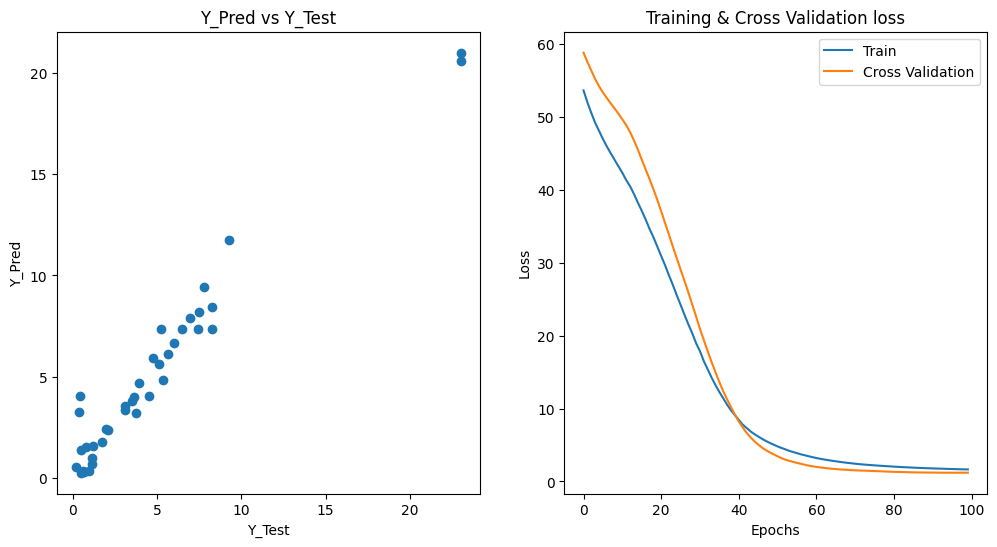

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))  #
axs[0].scatter(Y_test,Y_Pred1)
axs[0].set_title("Y_Pred vs Y_Test")
axs[0].set_ylabel('Y_Pred')
axs[0].set_xlabel('Y_Test')

axs[1].plot(fitmod1.history['loss'])
axs[1].plot(fitmod1.history['val_loss'])
axs[1].set_title("Training & Cross Validation loss")
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('Epochs')
axs[1].legend(['Train', 'Cross Validation'], loc='upper right')
plt.show()

<font size="8">Model 2 with Dropout</font>

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2

model2 = Sequential([
  Dense(units=32, activation='relu'), #kernel_regularizer=l2(0.01)), 
  Dense(units=10, activation='relu'), #kernel_regularizer=l2(0.01)), 
  Dropout(0.5),  
  Dense(units=1, activation='linear'),#kernel_regularizer=l2(0.01)),
])


model2.compile(optimizer='adam',loss="mean_absolute_error", metrics=["mean_absolute_error"])
fitmod2=model2.fit(X_train,Y_train, validation_data=(X_cval,Y_cval),epochs=100,batch_size=64)


Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 4.4983 - mean_absolute_error: 4.4983 - val_loss: 4.7440 - val_mean_absolute_error: 4.7440
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.2844 - mean_absolute_error: 4.2844 - val_loss: 4.6872 - val_mean_absolute_error: 4.6872
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.3544 - mean_absolute_error: 4.3544 - val_loss: 4.6282 - val_mean_absolute_error: 4.6282
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4.4700 - mean_absolute_error: 4.4700 - val_loss: 4.5647 - val_mean_absolute_error: 4.5647
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4.4601 - mean_absolute_error: 4.4601 - val_loss: 4.5000 - val_mean_absolute_error: 4.5000
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.2911 - mean_absolute_error: 4.2911 - val_loss: 4.4298 - val_mean_absolute_error: 4.4298
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4.4001 - mean_absolute_error: 4.4001 - val_loss: 4.3532 -

In [22]:
#Use the model's evaluate method to predict and evaluate the test datasets
model2.summary()
Y_Pred2 = model2.predict(X_test)

#print(model.metrics_names)

Y_Pred2= Y_Pred2.flatten()
prediction2=pd.DataFrame({'Actual Price (lakhs)':Y_test,'Predicted Price (lakhs)':Y_Pred2,'Difference':Y_test-Y_Pred2})
prediction2



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 32)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,889 (7.38 KB)

 Trainable params: 629 (2.46 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,260 (4.93 KB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Actual Price (lakhs)  Predicted Price (lakhs)  Difference
60                   6.95                 8.310321   -1.360321
266                  3.65                 3.562056    0.087944
5                    9.25                 9.760391   -0.510391
177                  0.35                 0.709176   -0.359176
140                  0.60                 0.447111    0.152889
78                   5.25                 8.232949   -2.982949
111                  1.15                 0.652203    0.497797
82                  23.00                17.110325    5.889675
224                  5.11                 5.245405   -0.135405
109                  1.20                 0.875870    0.324130
93                  23.00                17.603542    5.396458
30                   3.10                 2.646505    0.453495
158                  0.48                 0.710175   -0.230175
45                   7.50                 7.209982    0.290018
281                  2.10                 2.140398   -0.040398
42                   1.95                 2.127266   -0.177266
33                   6.00                 5.878598    0.121402
9                    7.45                 6.270020    1.179980
17                   7.75                 7.854394   -0.104394
240                  5.35                 4.279199    1.070801
137                  0.65                 0.486059    0.163941
92                   3.51                 3.012381    0.497619
57                   4.75                 6.384896   -1.634896
124                  0.95                 0.469939    0.480061
75                   3.95                 3.990681   -0.040681
223                  8.25                 6.253609    1.996391
282                  8.25                 7.345983    0.904017
154                  0.50                 0.568077   -0.068077
132                  0.75                 0.854670   -0.104670
7                    6.50                 6.267348    0.232652
286                  5.65                 5.263140    0.386860
229                  3.10                 2.907534    0.192466
113                  1.15                 0.550946    0.599054
101                  1.70                 1.195624    0.504376
194                  0.20                 0.258349   -0.058349
246                  3.75                 2.905767    0.844233
290                  4.50                 3.745745    0.754255
173                  0.40                 0.788332   -0.388332

In [23]:
#evaluate the Mean Absolute Error, Mean Squared Error and R-Squared
MAE2='{:.2f}'.format(metrics.mean_absolute_error(Y_Pred2,Y_test))
MSE2='{:.2f}'.format(metrics.mean_squared_error(Y_Pred2,Y_test))
RS2='{:.2f}'.format(metrics.r2_score(Y_Pred2,Y_test))

print("Neural Network Method 2")
print('Mean Absolute Error:',MAE2)
print('Mean Squared Error :',MSE2)
print('R-Squared',RS2)

Neural Network Method 2
Mean Absolute Error: 0.82
Mean Squared Error : 2.33
R-Squared 0.86


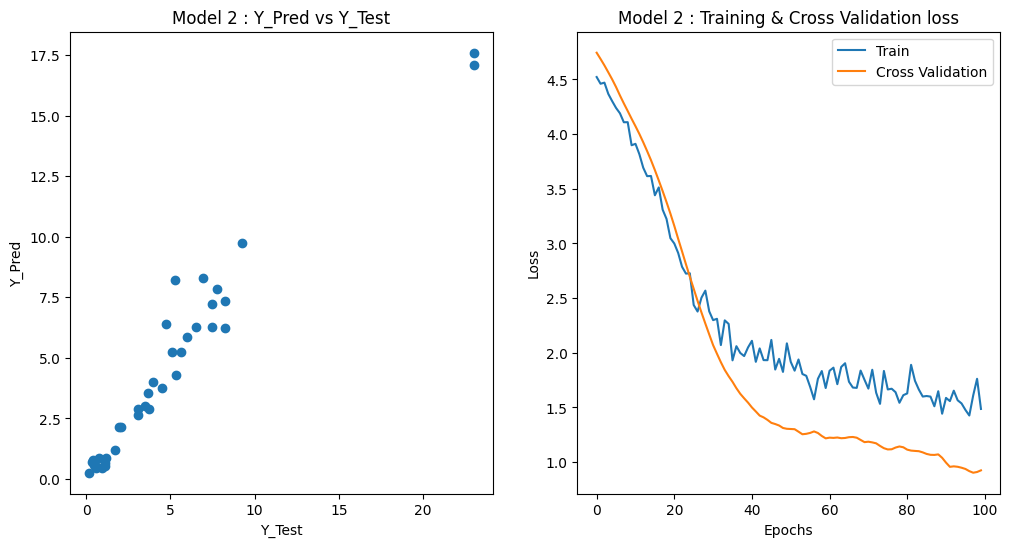

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))  #
axs[0].scatter(Y_test,Y_Pred2)
axs[0].set_title("Model 2 : Y_Pred vs Y_Test")
axs[0].set_ylabel('Y_Pred')
axs[0].set_xlabel('Y_Test')

axs[1].plot(fitmod2.history['loss'])
axs[1].plot(fitmod2.history['val_loss'])
axs[1].set_title("Model 2 : Training & Cross Validation loss")
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('Epochs')
axs[1].legend(['Train', 'Cross Validation'], loc='upper right')
plt.show()

<font size="8">Model 3 with Regularizer</font>

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2

model3 = Sequential([
  Dense(units=32, activation='relu', kernel_regularizer=l2(0.01)),
  Dense(units=10, activation='relu', kernel_regularizer=l2(0.01)), 
  Dense(units=1, activation='linear', kernel_regularizer=l2(0.01)),
])


model3.compile(optimizer='adam',loss="mean_absolute_error", metrics=["mean_absolute_error"])
fitmod3=model3.fit(X_train,Y_train, validation_data=(X_cval,Y_cval),epochs=100,batch_size=64)


Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 5.0380 - mean_absolute_error: 4.7254 - val_loss: 5.2429 - val_mean_absolute_error: 4.9313
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.2132 - mean_absolute_error: 4.9018 - val_loss: 5.1444 - val_mean_absolute_error: 4.8340
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4.5322 - mean_absolute_error: 4.2220 - val_loss: 5.0572 - val_mean_absolute_error: 4.7478
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.6692 - mean_absolute_error: 4.3599 - val_loss: 4.9714 - val_mean_absolute_error: 4.6628
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.6937 - mean_absolute_error: 4.3852 - val_loss: 4.8866 - val_mean_absolute_error: 4.5787
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.6204 - mean_absolute_error: 4.3126 - val_loss: 4.8027 - val_mean_absolute_error: 4.4954
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4.4837 - mean_absolute_error: 4.1764 - val_loss: 4.7224 - 

In [26]:
#Use the model's evaluate method to predict and evaluate the test datasets
model3.summary()

Y_Pred3 = model3.predict(X_test)

Y_Pred3 = Y_Pred3.flatten()
prediction3=pd.DataFrame({'Actual Price (lakhs)':Y_test,'Predicted Price (lakhs)':Y_Pred3,'Difference':Y_test-Y_Pred3})
prediction3


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 32)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,889 (7.38 KB)

 Trainable params: 629 (2.46 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,260 (4.93 KB)

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/stepWARNING:tensorflow:6 out of the last 6 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x70d5952904c0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Actual Price (lakhs)  Predicted Price (lakhs)  Difference
60                   6.95                 9.220198   -2.270198
266                  3.65                 4.106832   -0.456832
5                    9.25                10.046331   -0.796331
177                  0.35                 0.262550    0.087450
140                  0.60                 0.474805    0.125195
78                   5.25                 9.061558   -3.811558
111                  1.15                 0.763241    0.386759
82                  23.00                18.933302    4.066698
224                  5.11                 5.499280   -0.389280
109                  1.20                 0.885459    0.314541
93                  23.00                19.584944    3.415056
30                   3.10                 3.010641    0.089359
158                  0.48                 0.725732   -0.245732
45                   7.50                 7.737467   -0.237467
281                  2.10                 2.792021   -0.692021
42                   1.95                 2.564796   -0.614796
33                   6.00                 6.483395   -0.483395
9                    7.45                 6.660500    0.789500
17                   7.75                 8.498766   -0.748766
240                  5.35                 5.045992    0.304008
137                  0.65                 0.529547    0.120453
92                   3.51                 3.729022   -0.219022
57                   4.75                 7.004854   -2.254854
124                  0.95                 0.580805    0.369195
75                   3.95                 4.610384   -0.660384
223                  8.25                 6.675607    1.574393
282                  8.25                 8.608372   -0.358372
154                  0.50                 0.643824   -0.143824
132                  0.75                 0.891506   -0.141506
7                    6.50                 6.623853   -0.123853
286                  5.65                 5.939843   -0.289843
229                  3.10                 3.396640   -0.296640
113                  1.15                 0.525436    0.624564
101                  1.70                 1.171962    0.528038
194                  0.20                 0.229256   -0.029256
246                  3.75                 3.125984    0.624016
290                  4.50                 4.115700    0.384300
173                  0.40                 0.693625   -0.293625

In [27]:
#evaluate the Mean Absolute Error, Mean Squared Error and R-Squared
MAE3='{:.2f}'.format(metrics.mean_absolute_error(Y_Pred3,Y_test))
MSE3='{:.2f}'.format(metrics.mean_squared_error(Y_Pred3,Y_test))
RS3='{:.2f}'.format(metrics.r2_score(Y_Pred3,Y_test))

print("Neural Network Method 3")
print('Mean Absolute Error:',MAE3)
print('Mean Squared Error :',MSE3)
print('R-Squared',RS3)

Neural Network Method 3
Mean Absolute Error: 0.77
Mean Squared Error : 1.62
R-Squared 0.92


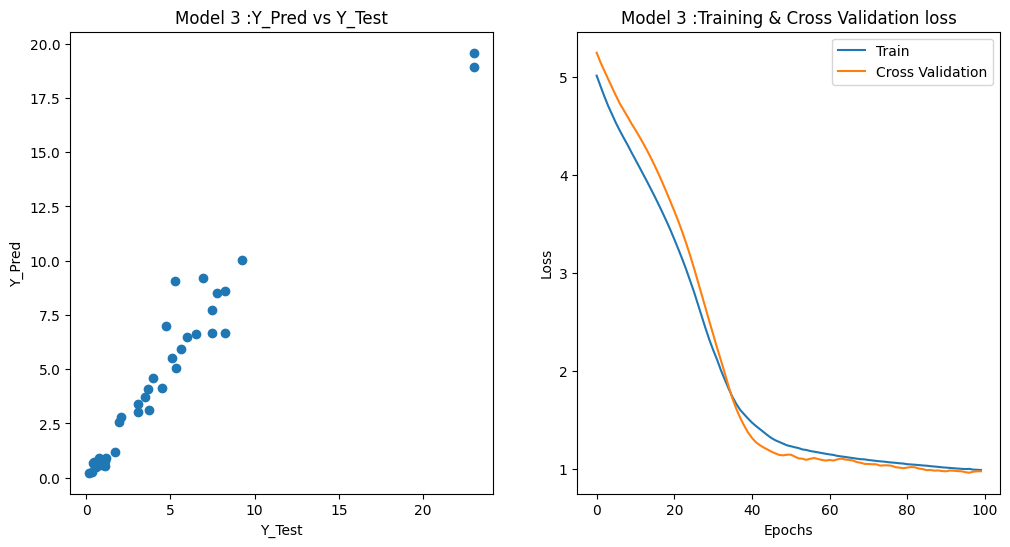

In [28]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))  #
axs[0].scatter(Y_test,Y_Pred3)
axs[0].set_title("Model 3 :Y_Pred vs Y_Test")
axs[0].set_ylabel('Y_Pred')
axs[0].set_xlabel('Y_Test')

axs[1].plot(fitmod3.history['loss'])
axs[1].plot(fitmod3.history['val_loss'])
axs[1].set_title("Model 3 :Training & Cross Validation loss")
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('Epochs')
axs[1].legend(['Train', 'Cross Validation'], loc='upper right')
plt.show()

<font size="8">Model 4 with Dropout and Regularizer</font>

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2

model4 = Sequential([

    Dense(units=32, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(units=10, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(units=1, activation='linear',kernel_regularizer=l2(0.01)),
])

#model4.compile(optimizer='adam', loss='mse')
#OR
#model4.compile(optimizer='rmsprop', loss='mse')

#model4.fit(X_train,y_train,epochs=100)


model4.compile(optimizer='adam',loss="mean_absolute_error", metrics=["mean_absolute_error"])
fitmod4=model4.fit(X_train,Y_train, validation_data=(X_cval,Y_cval),epochs=100,batch_size=64)


Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 4.4258 - mean_absolute_error: 4.1132 - val_loss: 5.0778 - val_mean_absolute_error: 4.7660
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.6805 - mean_absolute_error: 4.3689 - val_loss: 5.0070 - val_mean_absolute_error: 4.6962
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4.4093 - mean_absolute_error: 4.0987 - val_loss: 4.9408 - val_mean_absolute_error: 4.6310
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4.6747 - mean_absolute_error: 4.3650 - val_loss: 4.8785 - val_mean_absolute_error: 4.5696
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4.7619 - mean_absolute_error: 4.4532 - val_loss: 4.8204 - val_mean_absolute_error: 4.5124
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.5194 - mean_absolute_error: 4.2116 - val_loss: 4.7652 - val_mean_absolute_error: 4.4582
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.5597 - mean_absolute_error: 4.2529 - val_loss: 4.7144 -

In [30]:
#Use the model's evaluate method to predict and evaluate the test datasets
Y_Pred4 = model4.predict(X_test.values,)

Y_Pred4 = Y_Pred4.flatten()
prediction4=pd.DataFrame({'Actual Price (lakhs)':Y_test,'Predicted Price (lakhs)':Y_Pred4,'Difference':Y_test-Y_Pred4})
prediction4


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Actual Price (lakhs)  Predicted Price (lakhs)  Difference
60                   6.95                 6.893299    0.056701
266                  3.65                 3.538239    0.111761
5                    9.25                 8.335637    0.914363
177                  0.35                 0.392896   -0.042896
140                  0.60                 0.358591    0.241409
78                   5.25                 7.481109   -2.231109
111                  1.15                 0.734172    0.415828
82                  23.00                14.626547    8.373453
224                  5.11                 4.161355    0.948645
109                  1.20                 0.861594    0.338406
93                  23.00                15.397388    7.602612
30                   3.10                 2.965107    0.134893
158                  0.48                 0.739450   -0.259450
45                   7.50                 6.034854    1.465146
281                  2.10                 2.318489   -0.218489
42                   1.95                 2.084601   -0.134601
33                   6.00                 5.436735    0.563265
9                    7.45                 5.664582    1.785418
17                   7.75                 7.111893    0.638107
240                  5.35                 4.410709    0.939291
137                  0.65                 0.434963    0.215037
92                   3.51                 3.276108    0.233892
57                   4.75                 5.282121   -0.532121
124                  0.95                 0.536340    0.413660
75                   3.95                 3.984916   -0.034916
223                  8.25                 5.695957    2.554043
282                  8.25                 6.948137    1.301863
154                  0.50                 0.514050   -0.014050
132                  0.75                 0.836700   -0.086700
7                    6.50                 5.665334    0.834666
286                  5.65                 5.007936    0.642064
229                  3.10                 3.229282   -0.129282
113                  1.15                 0.591652    0.558348
101                  1.70                 0.971182    0.728818
194                  0.20                 0.288039   -0.088039
246                  3.75                 2.521893    1.228107
290                  4.50                 3.486417    1.013583
173                  0.40                 0.747964   -0.347964

In [31]:
#evaluate the Mean Absolute Error, Mean Squared Error and R-Squared
MAE4='{:.2f}'.format(metrics.mean_absolute_error(Y_Pred4,Y_test))
MSE4='{:.2f}'.format(metrics.mean_squared_error(Y_Pred4,Y_test))
RS4='{:.2f}'.format(metrics.r2_score(Y_Pred4,Y_test))

print("Neural Network Method 4")
print('Mean Absolute Error:',MAE4)
print('Mean Squared Error :',MSE4)
print('R-Squared',RS4)

Neural Network Method 4
Mean Absolute Error: 1.01
Mean Squared Error : 4.09
R-Squared 0.68


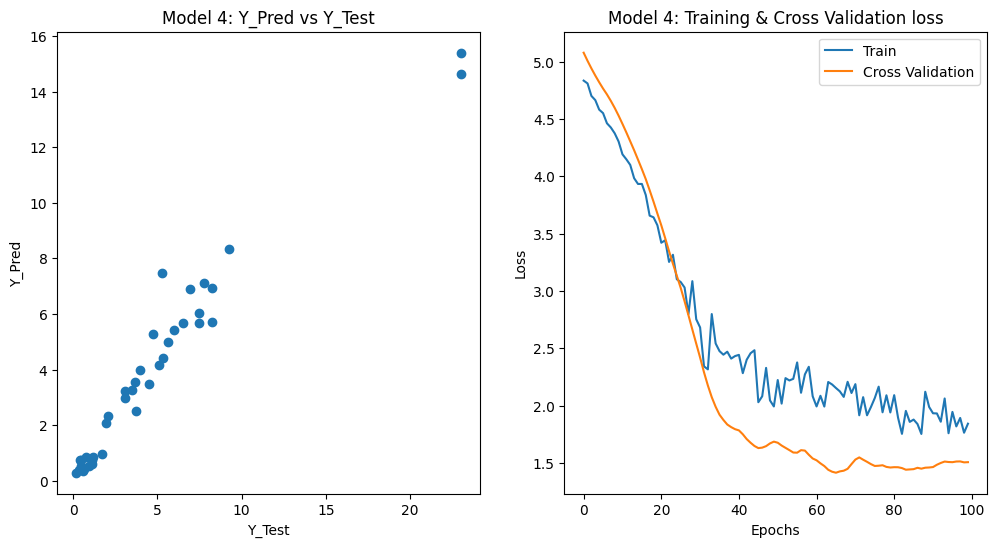

In [32]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))  #
axs[0].scatter(Y_test,Y_Pred4)
axs[0].set_title("Model 4: Y_Pred vs Y_Test")
axs[0].set_ylabel('Y_Pred')
axs[0].set_xlabel('Y_Test')

axs[1].plot(fitmod4.history['loss'])
axs[1].plot(fitmod4.history['val_loss'])
axs[1].set_title("Model 4: Training & Cross Validation loss")
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('Epochs')
axs[1].legend(['Train', 'Cross Validation'], loc='upper right')
plt.show()

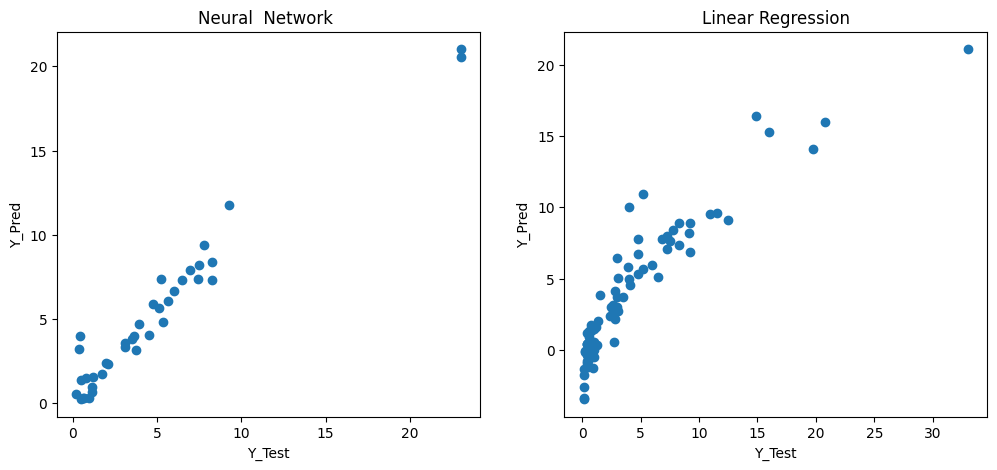

In [33]:
#Linear Reression and Neural Network results

fig, axs = plt.subplots(1, 2, figsize=(12, 5))  
axs[0].scatter(Y_test,Y_Pred1)
axs[0].set_title("Neural  Network ")
axs[0].set_ylabel('Y_Pred')
axs[0].set_xlabel('Y_Test')


axs[1].scatter(Y_testLR,Y_PredLR)
axs[1].set_title("Linear Regression")
axs[1].set_ylabel('Y_Pred')
axs[1].set_xlabel('Y_Test')
plt.show()


<span style="font-size: 20px;">   .</span>

In [34]:
#Creating dataframe for Table
err={'METHOD' : ['Linear Regression','Simple Neural Network', 'NN with Dropout', 'NN with Regularizer','NN with Dropout & Reularizer' ],
    'Mean Absolute Error' : [MAE_LR, MAE1, MAE2, MAE3, MAE4 ],
     'Mean Squared Error' : [MSE_LR, MSE1, MSE2, MSE3, MSE4  ],
     'R-Squared' : [RS_LR, RS1, RS2, RS3, RS4 ]}
err_df=pd.DataFrame(err).set_index('METHOD')
err_df

Mean Absolute Error Mean Squared Error R-Squared
METHOD                                                                       
Linear Regression                           1.43               5.34      0.78
Simple Neural Network                       0.86               1.44      0.94
NN with Dropout                             0.82               2.33      0.86
NN with Regularizer                         0.77               1.62      0.92
NN with Dropout & Reularizer                1.01               4.09      0.68

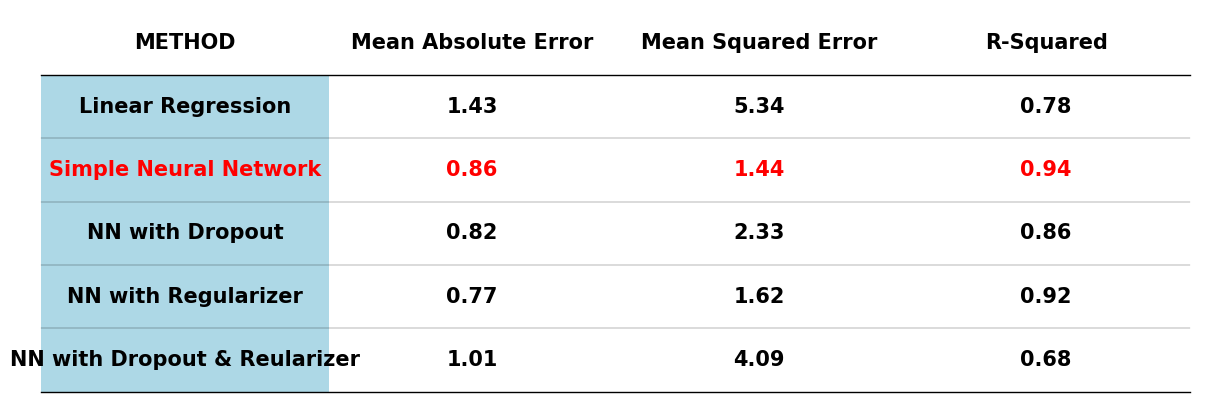

In [35]:

from plottable import Table
from plottable import ColumnDefinition

fig, ax = plt.subplots(figsize=(15, 5))

# Create the Table() object
#tab = Table(err_df)
#OR

tab = Table(err_df,textprops={"ha": "center","fontsize": "15", "weight": "bold"},footer_divider=True)

# Change the color and fontsize of columns data
tab.columns['METHOD'].set_facecolor("lightblue")

#change fontsize for specific column
#tab.columns["METHOD"].set_fontsize("12")


tab.columns['Mean Absolute Error'].set_fontcolor("black")
#tab.columns["Mean Absolute Error"].set_fontsize("12")

tab.columns['Mean Squared Error'].set_fontcolor("black")
#tab.columns["Mean Squared Error"].set_fontsize("12")

tab.columns['R-Squared'].set_fontcolor("black")
#tab.columns["R-Squared"].set_fontsize("12")     

#change color of second row values
tab.rows[1].set_fontcolor("red")


# Display the output
plt.show()

#Save table in png format
#fig.savefig("/home/mohit/Downloads/Error vs Method Tabel.png")